# Altitude dependent on amount of points averaged


In [1]:
from aux.gpx_read import *
from aux.imu_read import *
from aux.lidar_read import *
from aux.navsat_read import *
from aux.px4_read import *
from aux.rosbag_aux import *
from aux.srr308_read import *

import datetime

folder_path = 'data/50m_1'
db3_reader = get_db3_reader(folder_path, 'ROSBAG*')
db3_px4_reader = get_db3_reader(folder_path, 'sensor_bag*')

first_sample = 0
last_sample = 500

radar_df = get_srr308_pointcloud_df_from_db3_reader(db3_reader)
lidar_df = get_lidar_df_from_db3_reader(db3_reader)

first_timestamp = radar_df['timestamp_sample'][first_sample]
print("First timestamp", datetime.datetime.fromtimestamp(first_timestamp).isoformat())

Found ROS 2 bag: data/50m_1/ROSBAG_2025-04-28_12-21-24.378/ROSBAG_2025-04-28_12-21-24.378_0.db3
Found ROS 2 bag: data/50m_1/sensor_bag_20250428_122123/sensor_bag_20250428_122123_0.db3


[INFO] [1746007627.235141660] [rosbag2_storage]: Opened database 'data/50m_1/ROSBAG_2025-04-28_12-21-24.378/ROSBAG_2025-04-28_12-21-24.378_0.db3' for READ_ONLY.
[INFO] [1746007627.494959740] [rosbag2_storage]: Opened database 'data/50m_1/sensor_bag_20250428_122123/sensor_bag_20250428_122123_0.db3' for READ_ONLY.


First timestamp 2025-04-28T12:21:17.389383


In [3]:
lidar_altitude_10 = get_altitude_from_lidar_pc(lidar_df['np_points'], (0,0), 10)
lidar_altitude_5 = get_altitude_from_lidar_pc(lidar_df['np_points'], (0,0), 5)
lidar_altitude_3 = get_altitude_from_lidar_pc(lidar_df['np_points'], (0,0), 3)
radar_altitude_10 = get_altitude_from_radar_pc(radar_df['points'], 0, 10)
radar_altitude_5 = get_altitude_from_radar_pc(radar_df['points'], 0, 5)
radar_altitude_3 = get_altitude_from_radar_pc(radar_df['points'], 0, 3)

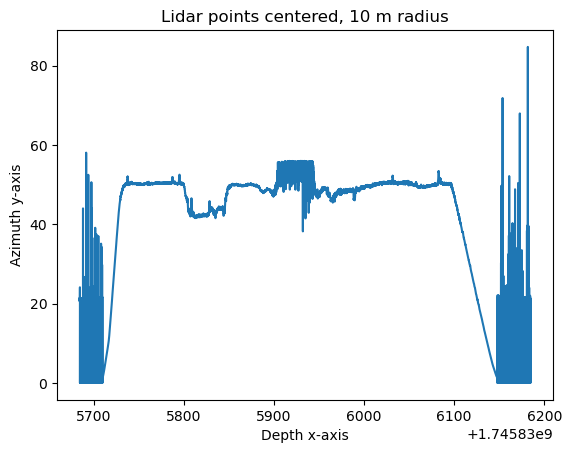

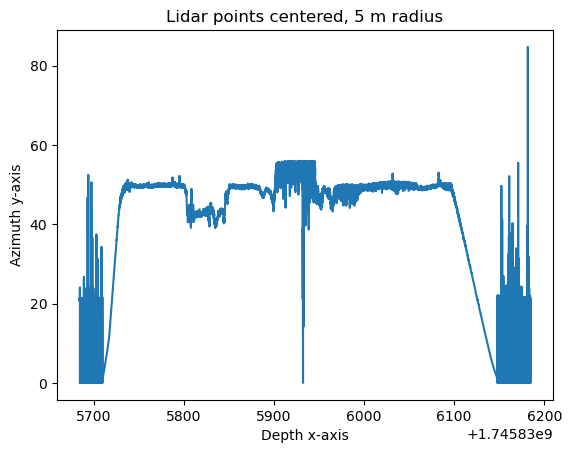

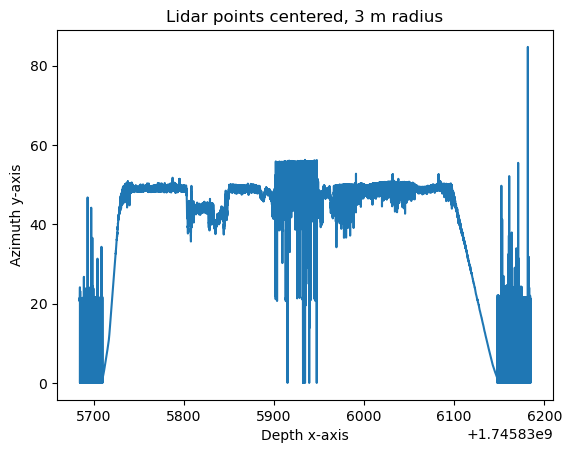

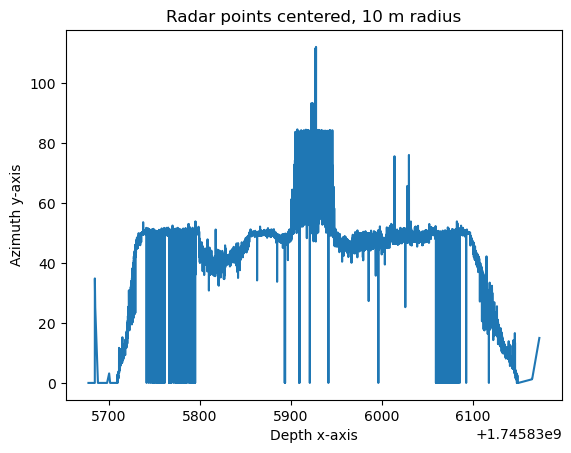

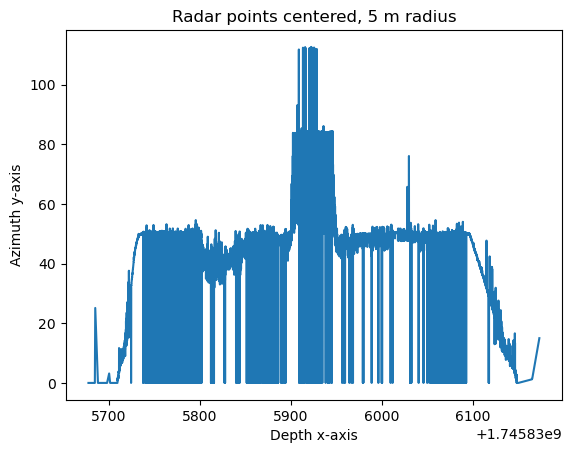

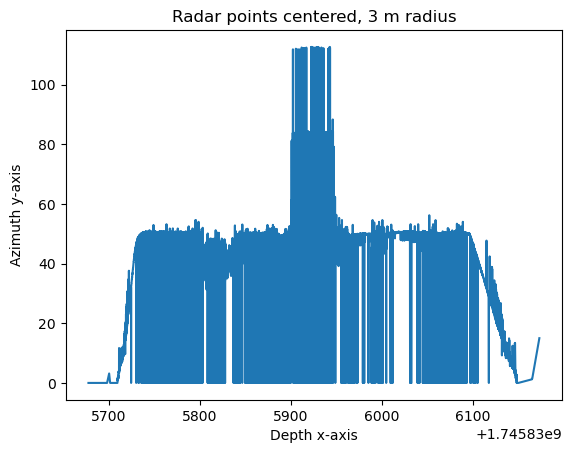

In [ ]:

plt.figure()
plt.plot(lidar_df['timestamp_sample'], lidar_altitude_10)
plt.title("Lidar points centered, 10 m radius")
plt.xlabel("Depth x-axis")
plt.ylabel("Azimuth y-axis")

plt.figure()
plt.plot(lidar_df['timestamp_sample'], lidar_altitude_5)
plt.title("Lidar points centered, 5 m radius")
plt.xlabel("Depth x-axis")
plt.ylabel("Azimuth y-axis")

plt.figure()
plt.plot(lidar_df['timestamp_sample'], lidar_altitude_3)
plt.title("Lidar points centered, 3 m radius")
plt.xlabel("Depth x-axis")
plt.ylabel("Azimuth y-axis")

plt.figure()
plt.plot(radar_df['timestamp_sample'], radar_altitude_10)
plt.title("Radar points centered, 10 m radius")
plt.xlabel("Depth x-axis")
plt.ylabel("Azimuth y-axis")

plt.figure()
plt.plot(radar_df['timestamp_sample'], radar_altitude_5)
plt.title("Radar points centered, 5 m radius")
plt.xlabel("Depth x-axis")
plt.ylabel("Azimuth y-axis")

plt.figure()
plt.plot(radar_df['timestamp_sample'], radar_altitude_3)
plt.title("Radar points centered, 3 m radius")
plt.xlabel("Depth x-axis")
plt.ylabel("Azimuth y-axis")
plt.show()